# Importing the Libraries

In [ ]:
import numpy as np

import pandas as pd

import os

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import svm

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from sklearn.model_selection import cross_val_score

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import joblib

from sklearn.metrics import accuracy_score

## Read the Dataset

In [ ]:
df=pd.read_csv("/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

# Handling Outliers

<ipython-input-5-c4396d9d2189>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


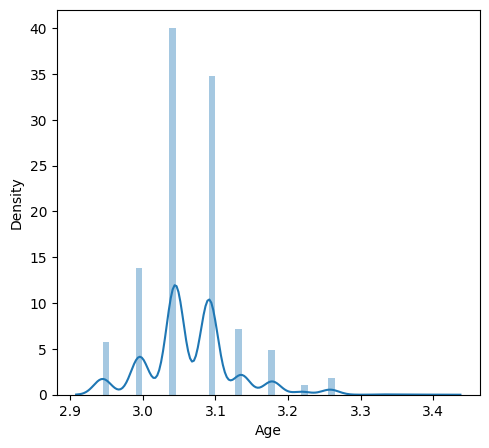

In [ ]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)

transformationplot(np.log(df['Age']))

# Handling Catogarical Values

In [ ]:
df=df.replace(['Male'], [0])
df=df.replace(['Female'], [1])

df = df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],
[0,1,2,3,4,5])

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,1,1,6,0,0,1
3,21,0,1,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,1,1,7,0,0,0
2964,22,0,0,1,7,0,0,0


# Univariate Analysis Task 3

<ipython-input-8-fad8eb49de42>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'], color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

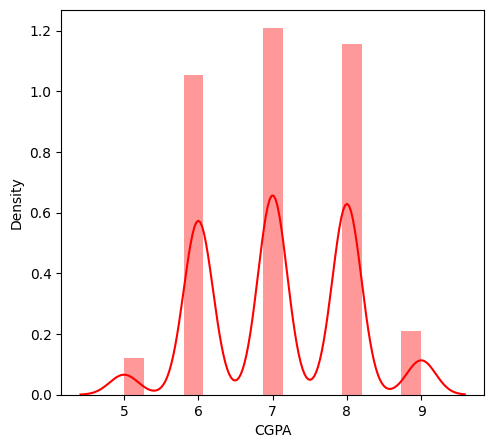

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(121)

sns.distplot(df['CGPA'], color='r')

<ipython-input-9-5c9c35cd817d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'], color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

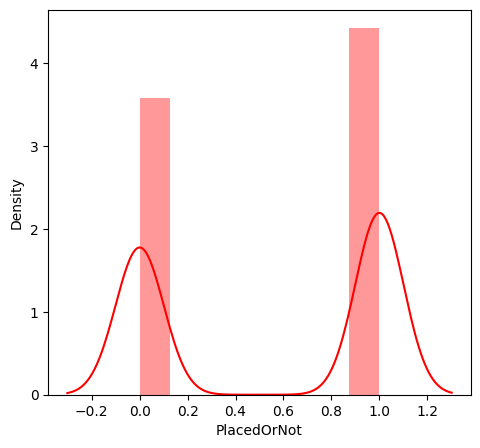

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(121)

sns.distplot(df['PlacedOrNot'], color='r')

# Bivariate Analysis

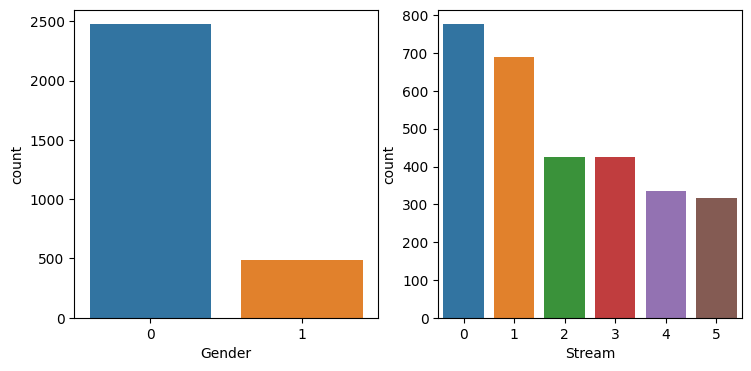

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(141)
sns.countplot(x=df['Gender'])
plt.subplot(142)
sns.countplot(x=df['Stream'])
plt.show()

# Multivariate Analysis

<Axes: xlabel='PlacedOrNot', ylabel='count'>

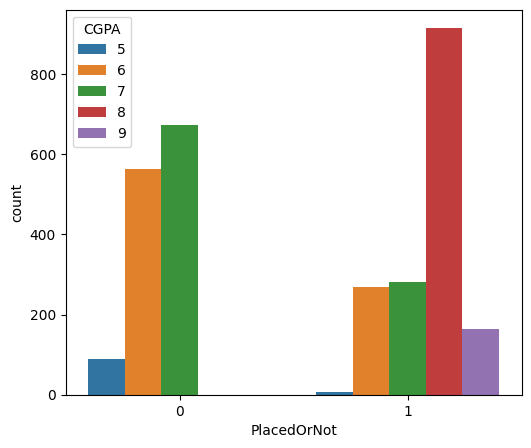

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=df["PlacedOrNot"],hue=df['CGPA'])

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 89.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


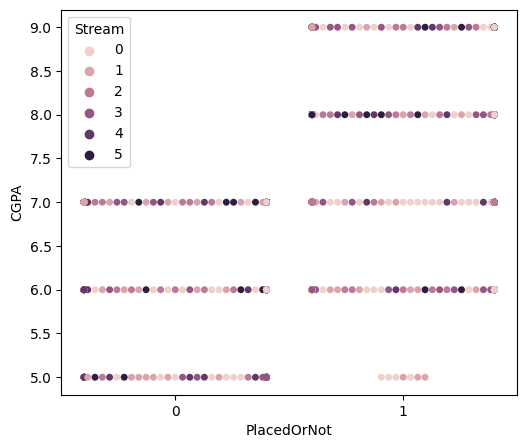

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.swarmplot(x=df['PlacedOrNot'], y=df['CGPA'], hue=df['Stream'])

# Scaling the Data

In [14]:
# separate features and target variable
x = df.drop(['HistoryOfBacklogs'], axis=1)
y = df['Internships']

# create a StandardScaler object
sc = StandardScaler()

# standardize the values of the features in x
x_bal = sc.fit_transform(x)

# print the standardized dataset
print(x_bal)

[[ 0.38813058 -0.44540301  0.04008175 ...  0.95719068  1.64826939
   0.89979999]
 [-0.36675158  2.24515772 -1.14874288 ... -0.07631043  1.64826939
   0.89979999]
 [ 0.38813058  2.24515772 -0.55433057 ... -1.10981154 -0.60669694
   0.89979999]
 ...
 [ 0.38813058 -0.44540301 -0.55433057 ... -0.07631043 -0.60669694
  -1.11135809]
 [ 0.38813058 -0.44540301 -1.14874288 ... -0.07631043 -0.60669694
  -1.11135809]
 [ 1.14301273 -0.44540301  1.82331869 ...  0.95719068 -0.60669694
   0.89979999]]


In [15]:
names = x.columns
x_bal = pd.DataFrame(x_bal,columns=names)
print(x_bal)

           Age    Gender    Stream  Internships      CGPA    Hostel  \
0     0.388131 -0.445403  0.040082     0.400445  0.957191  1.648269   
1    -0.366752  2.245158 -1.148743    -0.950773 -0.076310  1.648269   
2     0.388131  2.245158 -0.554331     0.400445 -1.109812 -0.606697   
3    -0.366752 -0.445403 -0.554331    -0.950773  0.957191 -0.606697   
4     0.388131 -0.445403  0.634494    -0.950773  0.957191  1.648269   
...        ...       ...       ...          ...       ...       ...   
2961  1.143013 -0.445403 -0.554331    -0.950773 -0.076310 -0.606697   
2962  1.143013 -0.445403  0.634494     0.400445 -0.076310  1.648269   
2963  0.388131 -0.445403 -0.554331     0.400445 -0.076310 -0.606697   
2964  0.388131 -0.445403 -1.148743     0.400445 -0.076310 -0.606697   
2965  1.143013 -0.445403  1.823319    -0.950773  0.957191 -0.606697   

      PlacedOrNot  
0        0.899800  
1        0.899800  
2        0.899800  
3        0.899800  
4        0.899800  
...           ...  
2961   

# Splitting the Data into Train and Test

In [16]:
# check the dataframe columns
print(df.columns)

# convert categorical variables to numerical using one-hot encoding
if 'Gender' in df.columns and 'Stream' in df.columns:
    df = pd.get_dummies(df, columns=['Gender', 'Stream'], drop_first=True)

# separate features and target variable
X = df.drop(['PlacedOrNot'], axis=1)

# create a StandardScaler object
scaler = StandardScaler()

# standardize the values of the features in X
standardized_data = scaler.fit_transform(X)

# assign the standardized features to X
X = standardized_data

# assign the "PlacedOrNot" target variable to Y
Y = df['PlacedOrNot']

# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')
X_train shape: (2372, 11)
Y_train shape: (2372,)
X_test shape: (594, 11)
Y_test shape: (594,)


# Model Building Task4

# SVM Model

In [17]:
# create an SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear')

# train the classifier on the training data
classifier.fit(X_train, Y_train)

# print the accuracy of the classifier on the training and testing data
print("Training accuracy:", classifier.score(X_train, Y_train))
print("Testing accuracy:", classifier.score(X_test, Y_test))

Training accuracy: 0.7841483979763912
Testing accuracy: 0.7929292929292929


In [18]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
print('Accuracy score of the training data :', training_data_accuracy)

Accuracy score of the training data : 0.7841483979763912


# KNN Model

In [20]:
best_k = {"Regular":0}
best_score = {"Regular":0}
for k in range(3,50,2):
  
    ## Using Regular training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(X_train, Y_train)                              # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(X_test)                    # Predict on the test set
    score = metrics.accuracy_score(Y_test, knn_temp_pred)*100   # Get accuracy
    if score >= best_score["Regular"] and score < 100:          # Store best params
        best_score["Regular"] = score
        best_k["Regular"] = k


In [21]:
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))

## Instantiate the Models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])

## Fit the Model to the Training Set
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
testd = accuracy_score(knn_pred, Y_test)

---Results---
K: {'Regular': 11}
Score: {'Regular': 84.68013468013467}


# Artificial Neural Network Model

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import keras
from keras.layers import Dense

In [26]:
classifier=Sequential()

In [27]:
classifier.add(keras.layers.Dense (6, activation = 'relu', input_dim= 6))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras. layers. Dense(6, activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense (1, activation = 'sigmoid'))

In [28]:
loss_1= tf. keras. losses.BinaryCrossentropy()

classifier.compile(optimizer = 'Adam', loss = loss_1, metrics = ['accuracy'])